In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import jieba

In [2]:
data = pd.read_csv("./chinesespam.csv",encoding='utf-8')
data.head()

,type,text,Unnamed: 2,Unnamed: 3
0,ham,1506讲的是孔子后人的故事。一个老领导回到家乡，跟儿子感情不和，跟贪财的孙子孔为本和睦。老...,NaN,NaN
1,ham,那他为什么不愿意起诉，既然这样了！起诉后也有充分的理由！MM莫不是还生活在电影中，个人认为这...,NaN,NaN
2,ham,我觉得，负债不要紧，最重要的是能负得起这个责任来，\n欠了那么多钱，至少对当初拿出爱心来的网...,NaN,NaN
3,ham,"公司现在有内部推荐机会,2-3人主要从事视频编解码器在pc/dsp/arm上的优化工作.(h...",NaN,NaN
4,ham,鼓励一下！\n还是让姐姐们给你解答更好吧。\n 赫赫，很少有女生追男生的例子。不过还...,NaN,NaN


In [3]:
#停用词
stopword = []
with open("./stopword.txt","r",encoding="utf-8") as f:
    for line in f.readlines():
        stopword.append(line.strip())

y_label = np.where(data["type"]=="ham",1,0)
x_data = data["text"].apply(lambda x:" ".join([word for word in jieba.cut(x.strip().replace("\n","")) if word not in stopword]))
x_data = x_data.values

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LYPC\AppData\Local\Temp\jieba.cache
Loading model cost 2.066 seconds.
Prefix dict has been built succesfully.


In [4]:
print(x_data[1])
print("="*20)
print(x_data[2])

起诉 起诉 理由 MM 莫不是 生活 电影 中 结婚 感情 感情 何来 感情 传统 家庭 责任感 结婚 lp 家庭 责任感 强 自相矛盾 发了 帖子 急 事儿 走 回头一看 gj 回 帖子 感动 谢谢您 大部分 帖子 说 第三者 GG 厚道 说 自作自受 不想 辩论 中 帖子 里 说 明白 理解   GG 回去 在场 GG lp 打电话 谈 财产 事 旁边 想 如果说 GG 骗 两边 摆弄 房子 家电 第二次 说 5w 现金 说 30w 说 明知 GG lp 谈 有意 做 第三者 想 请 想想 GG 稍稍 长个 心眼 婚前 同居 结婚 结婚 感情 传统 家庭 责任感 父母 崔 先 结婚 并不认为 GG 感情 随便
负债 不要紧 负得起 责任 欠 多钱 至少 当初 拿出 爱心 网友 交待 心 实在 能力 一声 ID 激活 手机号 换 外地 北京 网友 找 不到 水木 fl 版 那阵 旁观 全过程 感觉 长大 孩子 社会 苦 现实 家里 反对 孩子 经济 收入 进 男孩子 人倒 真诚 事情 想 可惜 孩子 足够 经济 能力 养活 孩子 他生 时 不负责任 表现


In [5]:
#生成词汇表
voc_word = {}
for sentence in x_data:
    for word in sentence.split(" "):
        if word not in voc_word:
            voc_word[word] = len(voc_word)

In [6]:
len(voc_word)

7566

In [7]:
#word2vec
x_datavec = []
for sentence in x_data:
    sentence_arr = [0]*len(voc_word)
    for word in sentence.split(" "):
        sentence_arr[voc_word[word]] = 1
    x_datavec.append(sentence_arr)
len(x_datavec)

150

In [8]:
x_datavec[0]==x_datavec[1]

False

In [9]:
#训练nb
y = np.sum(y_label)*1.0/len(y_label)
p1num = np.ones(len(voc_word))
p0num = np.ones(len(voc_word))
#p1dem = 2
#p0dem = 2

p1dem = 2
p0dem = 2

for i in range(len(x_datavec)):
    data = x_datavec[i]
    if y_label[i] == 1:
        p1num += data
        p1dem += sum(data)
    else:
        p0num += data
        p0dem += sum(data)
print(p1num)
print(p0num)
print(p1dem)
print(p0dem)
p1vec = np.log(p1num*1.0/p1dem)
p0vec = np.log(p0num*1.0/p0dem)
print(p1vec)
print(p0vec)
print(y)

[2. 2. 2. ... 1. 1. 1.]
[1. 2. 1. ... 2. 2. 2.]
6395
7585
[-8.07012453 -8.07012453 -8.07012453 ... -8.76327171 -8.76327171
 -8.76327171]
[-8.93392789 -8.24078071 -8.93392789 ... -8.24078071 -8.24078071
 -8.24078071]
0.6666666666666666


In [10]:
for i in range(len(x_datavec)):
    data = x_datavec[i]
    p0 = sum(data*p0vec)+np.log(1-y)
    p1 = sum(data*p1vec)+np.log(y)
    print(p0,p1,1 if p0<p1 else 0,y_label[i])

-476.38945484647894 -421.41769717672156 1 1
-601.0090127170578 -520.747693426256 1 1
-450.0759995246844 -391.36770040046036 1 1
-402.0959716385184 -368.21631010067665 1 1
-391.6053786083705 -333.39030695362635 1 1
-605.9575060885219 -491.947881556165 1 1
-294.4740026804557 -255.88863675890656 1 1
-298.58966717078954 -257.8699047373357 1 1
-384.6366587488573 -341.19682765893435 1 1
-304.1010777527983 -261.6447475035419 1 1
-328.54818474837356 -279.6159686359791 1 1
-418.7122417956892 -376.32382385225293 1 1
-233.02269720664688 -198.85749219964325 1 1
-921.2441224601134 -822.315790226968 1 1
-309.68705277743754 -250.75420785509428 1 1
-366.70311151641414 -306.31695099567855 1 1
-452.94150182822295 -391.894898163266 1 1
-279.71878567709933 -247.58900086326992 1 1
-3863.162272081161 -3433.9005424315988 1 1
-279.5089655891457 -237.6234036339813 1 1
-539.5488098351353 -478.6748314108695 1 1
-431.9586828814876 -377.0169496373194 1 1
-375.65951226404883 -325.56074320745745 1 1
-848.66654280680

In [15]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_datavec,y_label,test_size=0.1,)
clf = BernoulliNB()
clf.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
predY=clf.predict(x_test)
import numpy as np
np.sum(predY==y_test)/len(y_test)

0.7333333333333333

In [18]:
from sklearn.model_selection import cross_val_score
krange = range(1,31)
error = []
for i in krange:
    nb = BernoulliNB()
    score = cross_val_score(nb,x_datavec,y_label,cv=10,scoring='accuracy')
    error.append(1-np.mean(score))


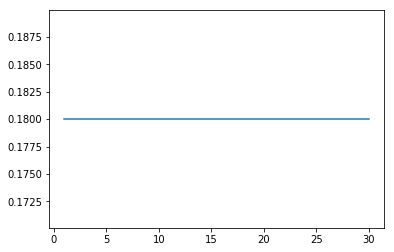

In [20]:
import matplotlib.pyplot as plt
plt.plot(krange,error)
plt.show()